# Apply transforms
Apply saved transforms to lightsheet data.

I will deal with high res by working in blocks.

In [1]:
# NOTE
# if any part of a chunk is accessed, the whole chunk is read.
# we need to update our chunking here
# not sure if I actually can

In [2]:
import numpy as np
import tifffile
import h5py
%matplotlib notebook
import matplotlib.pyplot as plt
import imp
import sys
sys.path.append('/home/dtward/data/csh_data/emlddmm')
import emlddmm
imp.reload(emlddmm)
sys.path.append('..')
import donglab_workflows as dw
import torch
import time
import os
from os.path import split,join,splitext

In [3]:
image_name = '/home/dtward/bmaproot/panfs/dong/3D_stitched_LS/20220725_SW220510_02_LS/SW220510_02_LS_6x_1000z.ims'
transformation_name = 'lightsheet_outputs_2022_09_21/transformation_outputs_lightsheet_v03newdownsample.npy'
atlas_name = '/home/dtward/data/AllenInstitute/allen_vtk/ara_nissl_10.vtk'
# we use the atlas to get a set of points on which to resample this dataset
output_path = '/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01'
output_prepend = 'SW220510_02_LS_6x_1000z_to_atlas_channel0_' # prepended to ####.tif
datastr = 'DataSet/ResolutionLevel 0/TimePoint 0/Channel 0/Data'

os.makedirs(output_path,exist_ok=True)

In [4]:
tformdata = np.load(transformation_name,allow_pickle=True).item()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# set up a domain
f = h5py.File(image_name,'r')

In [6]:
dJ = dw.imaris_get_pixel_size(f)
xJ = dw.imaris_get_x(f)
xJ0 = np.array([x[0] for x in xJ])
nJ = np.array([len(x) for x in xJ])

In [7]:
xI_,I_,title_,names_ = emlddmm.read_data(atlas_name)

In [8]:
xI = [np.arange(x[0],x[-1],dx) for x,dx in zip(xI_,dJ)]

In [9]:
nI = np.array([len(x) for x in xI])
nI

array([13190, 11390,  7990])

In [10]:
blocksize = 256
nblocks = np.ceil(nI/blocksize).astype(int)

In [11]:
tform_ = emlddmm.compose_sequence(
                [
                    emlddmm.Transform(tformdata['v'],domain=tformdata['xv']),
                    emlddmm.Transform(tformdata['A'])
                ], 
                np.meshgrid(*tformdata['xv'],indexing='ij')
            )

/home/dtward/.local/intelpython3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/dtward/data/csh_data/emlddmm/emlddmm.py:2743: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  Xin = torch.as_tensor(Xin,device=transforms[0].data.device,dtype=transforms[0].data.dtype)


<IPython.core.display.Javascript object>


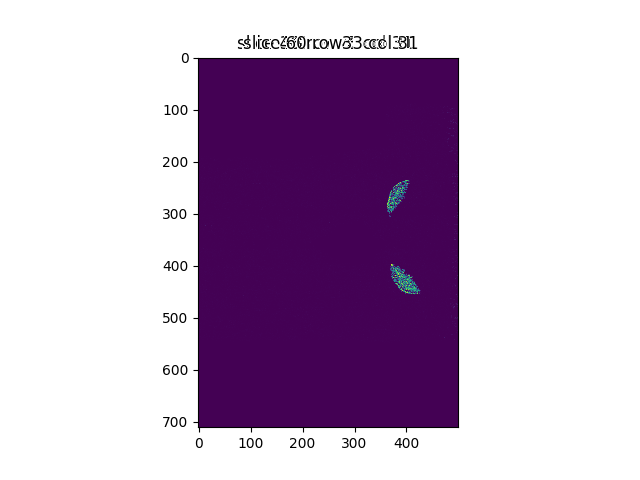

/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000000.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000001.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000002.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000003.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000004.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000005.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000006.tif
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_100

took 119.08629751205444
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000056.tif
took 119.04074597358704
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000057.tif
took 118.79992628097534
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000058.tif
took 119.25141072273254
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000059.tif
took 119.32931590080261
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000060.tif
took 119.0420343875885
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_1000z_to_atlas_v01/SW220510_02_LS_6x_1000z_to_atlas_channel0_000061.tif
took 118.77477431297302
/home/dtward/bmaproot/nafs/dtward/dong/SW220510_02_LS_6x_10

In [ ]:
# make an image for a given slice
fig,ax = plt.subplots()
downshow = 5
I = np.zeros(nI[1:],dtype=np.uint8)
# loop over slices
s0 = 0 # should be 0, just for testing
for s in range(s0,nI[0]):
    starttime = time.time()
    outname = join(output_path,f'{output_prepend}{s:06d}.tif')
    print(outname)
    # if this file exists, skip it
    if os.path.exists(outname):
        continue
    # loop over blocks?
    i0 = 0 # should be 0
    for i in range(i0,nblocks[1]):
        # indices
        indi = np.arange(blocksize) + i*blocksize
        indi = indi[indi < nI[1]]
        # locations
        xi = xI[1][indi]
        for j in range(nblocks[2]):
            # find the indices
            indj = np.arange(blocksize) + j*blocksize
            indj = indj[indj < nI[2]]            
            # get the locations
            xj = xI[2][indj]
            X = np.stack(np.meshgrid(xI[0][s],xi,xj,indexing='ij'))
            # regenerating this transform every time is slow, but for now I'm not going to worry
            # better would be just to generate it on the xv grid once, then interpolate it
            #tform = emlddmm.compose_sequence(
            #    [
            #        emlddmm.Transform(tformdata['v'],domain=tformdata['xv']),
            #        emlddmm.Transform(tformdata['A'])
            #    ], 
            #    X
            #)
            #start = time.time()
            tform = emlddmm.apply_transform_float(tformdata['xv'],tform_,torch.tensor(X,dtype=tform_.dtype))
            #print(f'calculating tform {time.time()-start}')
            
            # now we need a bounding box
            inds = (tform.numpy() - xJ0[:,None,None,None])/dJ[:,None,None,None]
            # boudnaries
            inds[inds<0] = 0
            inds[0,inds[0]>=nJ[0]] = nJ[0]-1
            inds[1,inds[1]>=nJ[1]] = nJ[1]-1
            inds[2,inds[2]>=nJ[2]] = nJ[2]-1
            mininds = np.floor(np.min(inds,axis=(1,2,3))).astype(int)
            maxinds = np.ceil(np.max(inds,axis=(1,2,3))).astype(int)            
            # need some boundary conditions, if I get an error I'll deal with it then
            # now we load the data
            
            start = time.time()
            data = f[datastr][
                mininds[0]:maxinds[0]+1,
                mininds[1]:maxinds[1]+1,
                mininds[2]:maxinds[2]+1
            ]
            #print(f'loading data {time.time()-start}')
            # okay now I've got a data cube, I need to sample it
            indsr = np.round(inds).astype(int)
            # subtract my index
            indsr0 = indsr - mininds[:,None,None,None]
            # okay I got an error here
            # I did bc above, don't need to do again
            #indsr0[indsr0 < 0] = 0
            #indsr0[0,indsr0[0]>=data.shape[0]] = data.shape[0]-1
            #indsr0[1,indsr0[1]>=data.shape[1]] = data.shape[1]-1
            #indsr0[2,indsr0[2]>=data.shape[2]] = data.shape[2]-1
            outputdata = data[indsr0[0],indsr0[1],indsr0[2]]
            
            # something wrong with below?
            indij = np.meshgrid(indi,indj,indexing='ij')
            I[indij[0],indij[1]] = outputdata
            
            
            #ax.cla()
            #ax.imshow(dw.downsample(I**0.25,[8,8]))
            #ax.set_title(f'slice {s} row {i} col {j}')
            #fig.canvas.draw()
            
            
            
            # dne this column
        start = time.time()
        ax.cla()
        ax.imshow(dw.downsample(I**0.125,[16,16]))
        ax.set_title(f'slice {s} row {i} col {j}')
        fig.canvas.draw()
        #print(f'drawing {time.time() - start}')
        # done this row
    # done this slice, now we have to save it
    tifffile.imwrite(outname,I,compression='jpeg')
    print(f'took {time.time() - starttime}')
                


In [ ]:
# close the imaris
f.close()